# Data Exploration

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

## Grouping Data

In [163]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                           'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.582525,-1.046623
1,bar,one,0.176628,-1.116735
2,foo,two,-1.848887,-0.229932
3,bar,three,-0.054262,0.350881
4,foo,two,1.873375,0.594815
5,bar,two,0.694389,-0.874280
6,foo,one,-0.836668,-0.182258
7,foo,three,-0.142527,0.220352


In [164]:
#This is a DataFrameGroupBy object
type(df.groupby('A'))

pandas.core.groupby.DataFrameGroupBy

In [165]:
df.groupby('A').count()

,B,C,D
A,,,
bar,3,3,3
foo,5,5,5


In [166]:
df.groupby('A').sum()

,C,D
A,,
bar,0.816755,-1.640135
foo,-0.372182,-0.643646


In [167]:
df.groupby('A').mean()

,C,D
A,,
bar,0.272252,-0.546712
foo,-0.074436,-0.128729


In [168]:
df.groupby(['A','B']).mean()

C         D
A   B                        
bar one    0.176628 -1.116735
    three -0.054262  0.350881
    two    0.694389 -0.874280
foo one   -0.127071 -0.614440
    three -0.142527  0.220352
    two    0.012244  0.182441

In [169]:
# descriptive statistics
df.groupby('A').describe()

C                                                              \
    count      mean       std       min       25%       50%       75%   
A                                                                       
bar   3.0  0.272252  0.383376 -0.054262  0.061183  0.176628  0.435508   
foo   5.0 -0.074436  1.410663 -1.848887 -0.836668 -0.142527  0.582525   

                  D                                                    \
          max count      mean       std       min       25%       50%   
A                                                                       
bar  0.694389   3.0 -0.546712  0.786734 -1.116735 -0.995508 -0.874280   
foo  1.873375   5.0 -0.128729  0.612579 -1.046623 -0.229932 -0.182258   

                         
          75%       max  
A                        
bar -0.261700  0.350881  
foo  0.220352  0.594815

## Aggregations

In [170]:
tsdf = pd.DataFrame(np.random.randn(10, 3), columns=['A', 'B', 'C'],
                    index=pd.date_range('1/1/2000', periods=10))
tsdf.iloc[3:7] = np.nan
tsdf

,A,B,C
2000-01-01,-0.606946,0.416723,-0.495617
2000-01-02,-0.052343,-0.594112,-1.844557
2000-01-03,-1.563686,-0.816609,1.695205
2000-01-04,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN
2000-01-08,1.164227,-1.345374,-0.593542
2000-01-09,0.881177,1.869670,-1.861619
2000-01-10,0.703085,0.578266,0.971592


In [171]:
#you can also create custom describe functions with agg() and functools module
tsdf.agg(['sum', lambda x: x.mean()])

,A,B,C
sum,0.525514,0.108564,-2.128538
<lambda>,0.087586,0.018094,-0.354756


## Pivot Tables

In [172]:
df2 = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                    'B' : ['A', 'B', 'C'] * 4,
                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                    'D' : np.random.randn(12),
                    'E' : np.random.randn(12)})
df2

,A,B,C,D,E
0,one,A,foo,-0.605347,1.446558
1,one,B,foo,0.483702,-0.293243
2,two,C,foo,-0.676889,-1.392431
3,three,A,bar,-0.860394,2.259185
4,one,B,bar,1.890382,0.440871
5,one,C,bar,0.663260,0.063442
6,two,A,foo,0.369645,-0.529378
7,three,B,foo,2.345386,-0.195156
8,one,C,foo,-0.091440,0.660654
9,one,A,bar,-1.174075,-0.313996


In [173]:
pd.pivot_table(df2, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -1.174075 -0.605347
      B  1.890382  0.483702
      C  0.663260 -0.091440
three A -0.860394       NaN
      B       NaN  2.345386
      C -0.278389       NaN
two   A       NaN  0.369645
      B  0.810477       NaN
      C       NaN -0.676889

In [174]:
pd.pivot_table(df2, values='D', index=['A', 'B'], columns=['C'], aggfunc=np.sum)

C             bar       foo
A     B                    
one   A -1.174075 -0.605347
      B  1.890382  0.483702
      C  0.663260 -0.091440
three A -0.860394       NaN
      B       NaN  2.345386
      C -0.278389       NaN
two   A       NaN  0.369645
      B  0.810477       NaN
      C       NaN -0.676889

## Time Series

In [175]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()

2012-01-01    22192
Freq: 5T, dtype: int64

In [176]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00   -0.152849
2012-03-07 00:00:00+00:00    1.072775
2012-03-08 00:00:00+00:00   -0.227759
2012-03-09 00:00:00+00:00   -0.444870
2012-03-10 00:00:00+00:00   -0.738842
Freq: D, dtype: float64

In [177]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.152849
2012-03-06 19:00:00-05:00    1.072775
2012-03-07 19:00:00-05:00   -0.227759
2012-03-08 19:00:00-05:00   -0.444870
2012-03-09 19:00:00-05:00   -0.738842
Freq: D, dtype: float64

## Descriptive statistics

In [178]:
#create df from dicts
df3 = pd.DataFrame({ 'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo' })
df3

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [179]:
#create DF from Random data
df4 = pd.DataFrame(np.random.randn(10,4))
df4

,0,1,2,3
0,-0.079225,1.256251,-1.315580,-1.044455
1,0.432803,1.094192,0.492031,-1.055585
2,1.003546,-1.443194,-1.765446,-0.167296
3,-0.648303,-0.353998,1.055012,0.057027
4,0.718652,-0.915899,-0.459730,0.364128
5,1.321838,-0.384389,0.919531,0.376210
6,-0.510881,-1.717231,1.149119,0.251896
7,-1.105830,0.181316,1.490226,-1.077604
8,0.796376,-1.071790,0.360782,0.129995
9,0.033998,0.158361,0.327284,-1.082757


In [180]:
df4.describe()

,0,1,2,3
count,10.000000,10.000000,10.000000,10.000000
mean,0.196298,-0.319638,0.225323,-0.324844
std,0.790121,1.005764,1.081686,0.655677
min,-1.105830,-1.717231,-1.765446,-1.082757
25%,-0.402967,-1.032818,-0.262976,-1.052803
50%,0.233401,-0.369194,0.426406,-0.055135
75%,0.776945,0.175577,1.021142,0.221421
max,1.321838,1.256251,1.490226,0.376210


In [181]:
df4.mean()

0    0.196298
1   -0.319638
2    0.225323
3   -0.324844
dtype: float64

In [182]:
#kurtosis
df4.kurtosis()

0   -1.048136
1   -0.898103
2   -0.263672
3   -2.158752
dtype: float64

In [183]:
#skew
df4.skew()

0   -0.243667
1    0.298779
2   -0.892131
3   -0.299392
dtype: float64

### Descriptive stats using apply

In [184]:
df4.apply(np.sum)

0    1.962975
1   -3.196383
2    2.253229
3   -3.248441
dtype: float64

In [185]:
df4.apply(lambda x: x.max() - x.min())

0    2.427667
1    2.973482
2    3.255672
3    1.458967
dtype: float64

## Histograms / Frequency tables

In [186]:
#Series value count
df4.iloc[:,0].value_counts()

 0.718652    1
-0.079225    1
-0.510881    1
 0.033998    1
-0.648303    1
 1.003546    1
 0.432803    1
 1.321838    1
-1.105830    1
 0.796376    1
Name: 0, dtype: int64

### Discretizing  or categorizing continuous data

In [187]:
arr = np.random.randn(20)
factor = pd.cut(arr, 4)
factor.value_counts()

(-1.828, -0.744]    4
(-0.744, 0.335]     9
(0.335, 1.414]      6
(1.414, 2.493]      1
dtype: int64

In [188]:
factor = pd.cut(arr, [-5, -1, 0, 1, 5])
factor.value_counts()

(-5, -1]    3
(-1, 0]     8
(0, 1]      7
(1, 5]      2
dtype: int64

## Compute Quantiles

In [189]:
arr = np.random.randn(30)
factor = pd.qcut(arr, [0, .25, .5, .75, 1])
pd.value_counts(factor)

(0.998, 2.391]      8
(-3.258, -0.548]    8
(0.0958, 0.998]     7
(-0.548, 0.0958]    7
dtype: int64

## Plotting

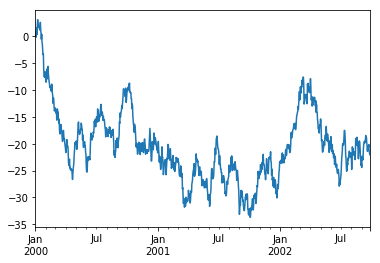

In [190]:
#plot timeseries
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

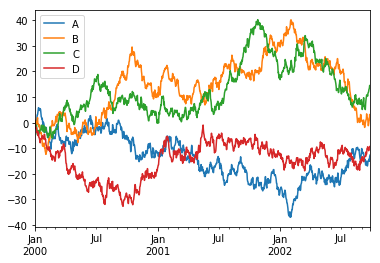

In [191]:
#plot dataframe
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

In [192]:
#create DF from Random data
df5 = pd.DataFrame(np.random.randn(10,4),columns=['F1','F2','F3','Label'])
df5.F1 = pd.Series(['one','one','one','two','two','two','three','three','three','Pi'])
df5

,F1,F2,F3,Label
0,one,0.143657,-0.100870,-0.919800
1,one,0.188494,0.164397,-0.596413
2,one,-0.768833,1.368233,1.699097
3,two,-1.296780,0.486176,0.490516
4,two,1.555664,-0.962413,0.380086
5,two,-0.147631,-0.071786,-1.477884
6,three,0.794819,0.906101,-0.205725
7,three,0.456526,1.766954,-0.859376
8,three,-0.702509,0.052653,-0.312392
9,Pi,0.242491,0.011930,-0.682211


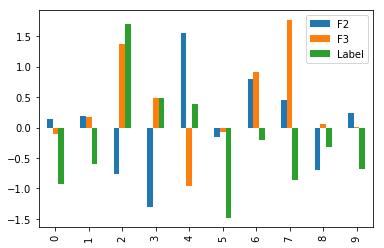

In [193]:
df5.plot.bar()

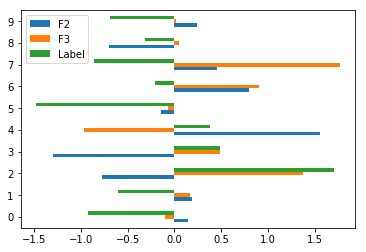

In [194]:
df5.plot.barh()

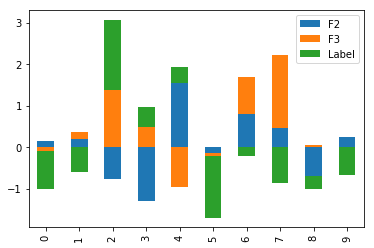

In [195]:
df5.plot.bar(stacked=True)

In [196]:
#conditional barplot???

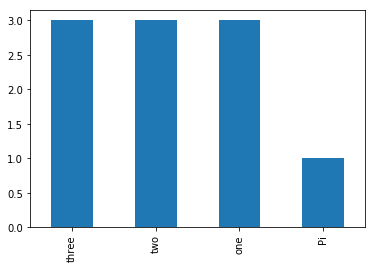

In [197]:
df5.F1.value_counts().plot.bar()

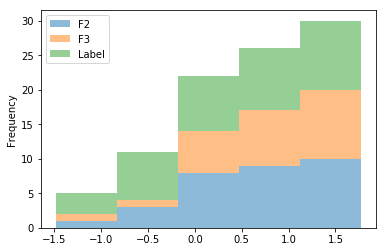

In [198]:
df5.plot.hist(bins=5, alpha=0.5, stacked=True, orientation='vertical', cumulative=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b0ac940>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a1d8bf160>]], dtype=object)

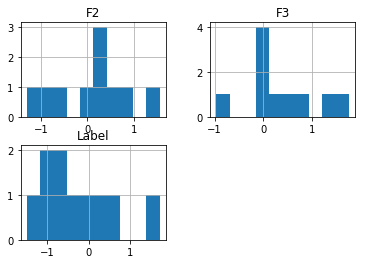

In [199]:
df5.hist()

In [200]:
#conditional histogram???

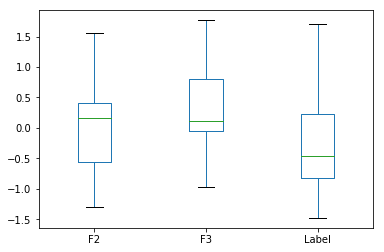

In [201]:
df5.plot.box()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1eb95c50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a1ed38438>]], dtype=object)

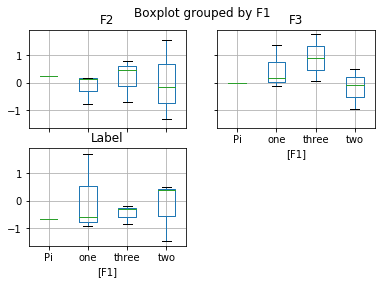

In [202]:
plt.figure()
df5.boxplot(by='F1', vert=True)

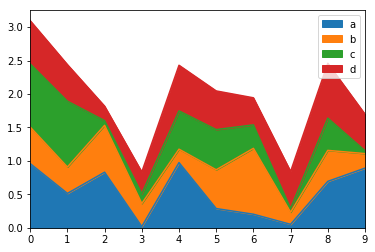

In [203]:
df6 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df6.plot.area();

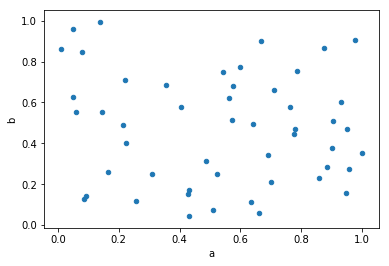

In [204]:
df7 = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])
df7.plot.scatter(x='a', y='b');

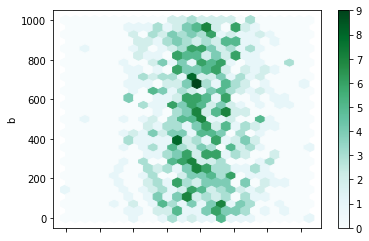

In [205]:
df8 = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])

df8['b'] = df8['b'] + np.arange(1000)

df8.plot.hexbin(x='a', y='b', gridsize=25)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f358588>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a1fa06ac8>]], dtype=object)

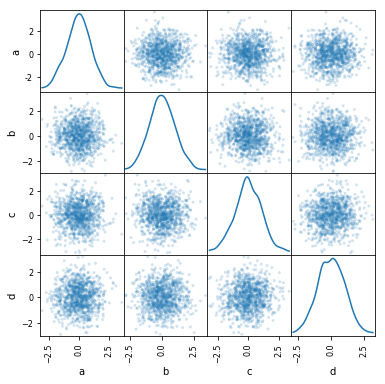

In [206]:
df = pd.DataFrame(np.random.randn(1000, 4), columns=['a', 'b', 'c', 'd'])
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

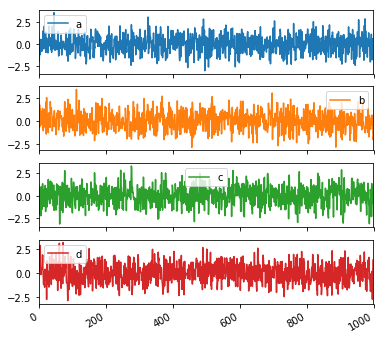

In [207]:
df.plot(subplots=True, figsize=(6, 6));